# Digital House
## Workshop #1 Data Science
### Análisis exploratorio de un dataset de precio de propiedades
EL dataset de propiedades denominado "Properatti" contiene información de inmuebles destinados a la venta en diferentes ciudades de la Republica Argentina.
Como tal, el objetivo de este 1er desafio es analizar en profundidad el dataset y cada uno de sus componentes para que el objetivo final sea la posibilidad de que el mismo sea utilizado para la predicción del precio de propiedades. Más precisamente, desarrollar un modelo de regresión que permita predecir el precio por metro cuadrado de una propiedad.

En una 1era instancia se analizará la información disponible del dataset en "crudo" para despues ir avanzando minisuosamente en cada uno de sus componentes y evaluar que tecnica de manipulación, limpieza y analisis deberiamos de poner en práctica.


## Introducción

El primer paso es importar las librerias Pandas, Numpy y Seaborn de Python para proceder a entender los básicos del dataset.

In [2]:
#Importacion de librerias de python
import pandas as pd
import numpy as np
import seaborn as sn

#Lectura del dataset en formato .cvs

df_prop=pd.read_csv("./properatti.csv")

## Exploración

Procedemos a leer los primeros 3 registros del dataset para tener una primera aproximación de la información que contiene.

In [3]:
#Utilizamos head() y limitaremos a 3 los datos a mostrar

df_prop.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


El dataset contiene 26 columnas y 121.220 registros (o filas). Como 1era conclusion vemos que los titulos o "nombres" de las columnas no poseen espacios en blanco, por lo cual consideramos que su posterior consulta para un modelo de regresión no generara problemas. Los espacios en blanco dentro del "nombre" de las columnas esta siendo reemplazado por "guión bajo" o "_".

In [4]:
df_prop.shape

(121220, 26)

In [5]:
round(df_prop.describe(),0)

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.0,102503.0,69670.0,69670.0,100810.0,100810.0,100810.0,81892.0,101313.0,68617.0,87658.0,7899.0,47390.0,14262.0
mean,60610.0,3574442.0,-35.0,-59.0,468526.0,4229397.0,239701.0,234.0,133.0,2160.0,6912.0,17.0,3.0,5009.0
std,34993.0,354131.0,2.0,2.0,2260101.0,6904714.0,391324.0,1782.0,724.0,2759.0,28379.0,120.0,2.0,120440.0
min,0.0,3427208.0,-55.0,-76.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0
25%,30305.0,3430234.0,-35.0,-59.0,110000.0,1583309.0,89734.0,50.0,45.0,1218.0,1550.0,1.0,2.0,1000.0
50%,60610.0,3433910.0,-35.0,-58.0,185000.0,2558452.0,145000.0,84.0,75.0,1800.0,2213.0,3.0,3.0,2000.0
75%,90914.0,3836668.0,-34.0,-58.0,420000.0,4675792.0,265000.0,200.0,150.0,2486.0,3356.0,6.0,4.0,4000.0
max,121219.0,6948895.0,5.0,-54.0,650000000.0,821271104.0,46545445.0,200000.0,187000.0,206333.0,4000000.0,3150.0,32.0,10001500.0


En el analisis de datos se pbserva que:
1. Price: tiene un valor máximo de 650.000.000, lo que resulta extraño teniendo en cuenta que el precio promedio, pero no podemos ver que tipo de moneda es.
2. Superficie cubierta: 187.000 metros cuadrados de superficie cubierta tambien resulta un valor demasiado grande.
3. Cantidad de ambientes: 32 cuando el promedio es 3.
4. Pisos: 3.150 cuando el promedio es 17 (Mediana 3).

Para la visualización, se elijen los parametros precio y tipo de propiedad en venta. Al hacer un boxplot, observamos que los valores a

<AxesSubplot:xlabel='property_type', ylabel='price'>

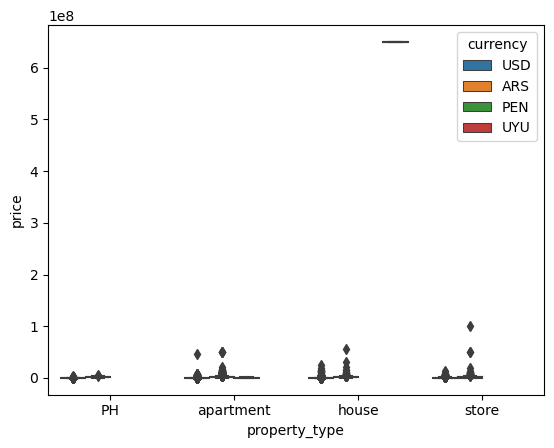

In [97]:
sn.boxplot(x=df_prop.property_type,
y=df_prop.price,
hue=df_prop.currency)

650000000.0


<AxesSubplot:xlabel='property_type', ylabel='price'>

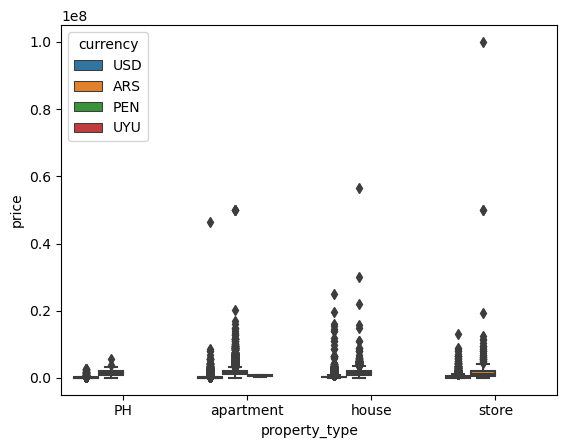

In [98]:
max_price=df_prop["price"].max()
print(max_price)
df_prop_no_max=df_prop.loc[df_prop["price"]!=max_price]
df_prop_no_max
sn.boxplot(x=df_prop_no_outlier.property_type,
y=df_prop_no_max.price,hue=df_prop.currency
)

75000.0
1233000.0


<AxesSubplot:xlabel='property_type', ylabel='price'>

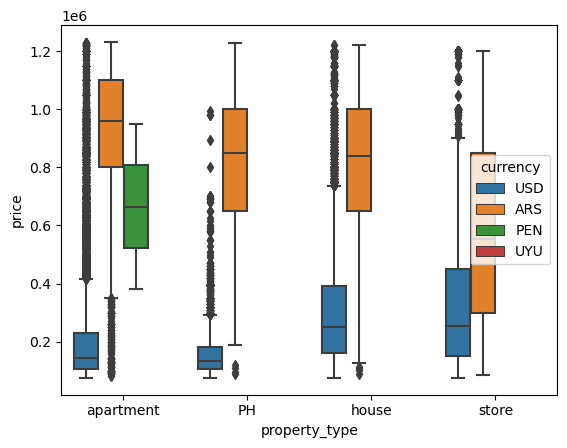

In [99]:
q_10=df_prop["price"].quantile(0.1)
print(q_10)

q_90=df_prop["price"].quantile(0.9)
print(q_90)

df_prop_q=df_prop.loc[(df_prop["price"]>q_10) & (df_prop["price"]<q_90)]
df_prop_q
sn.boxplot(x=df_prop_q.property_type,y=df_prop_q.price,hue=df_prop.currency)

75000.0
1233000.0


<AxesSubplot:xlabel='property_type', ylabel='price'>

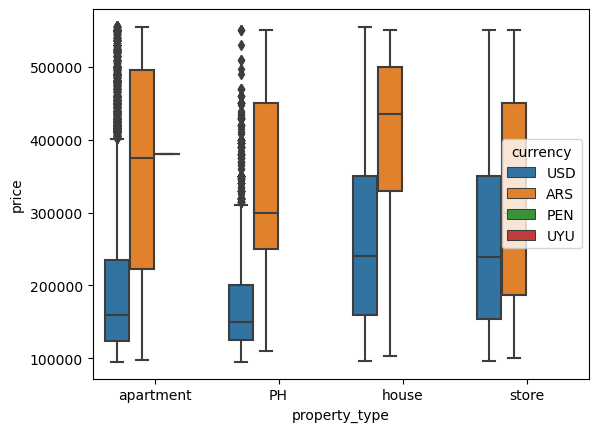

In [100]:
q_20=df_prop["price"].quantile(0.2)
print(q_10)

q_80=df_prop["price"].quantile(0.8)
print(q_90)

df_prop_q1=df_prop.loc[(df_prop["price"]>q_20) & (df_prop["price"]<q_80)]
df_prop_q1
sn.boxplot(x=df_prop_q1.property_type,y=df_prop_q1.price,hue=df_prop.currency)

### Identificación de tipos de datos en las columnas

Observamos que son 26 columnas, por lo cual procedemos a entender que tipo de datos contienen estas columnas para entender mejor su tratamiento.

In [6]:
#Con dtypes identificamos el tipo de datos que contiene cada columna.
df_prop.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

De las 26 columnas, se observa que los datos numericos como "float 64" corresponde solamente a los siguientes columnas:

-geonames_id

-lat

-lon

-price

-price_aprox_local_currency

-price_aprox_usd

-surface_total_in_m2

-surface_covered_in_m2

-price_usd_per_m2

-price_per_m2

-floor

-rooms

-expenses

Estos datos de tipo numerico resultan lógicos ya que estan relacionados al precio de la propiedad expresado en un tipo de moneda, precio de metro cuadrado en un tipo de moneda, cantidades de pisos y ambientes, y por ultimo el monto de expensas. Al considerar datos numericos, pueden existir faltantes.

Con respecto a los datos de Latitude y Longitud deberiamos de chequear que el mismo provenga de "geonames_id". En este caso consideraremos estos datos que permiten la geolocalización como alternativas para obtener datos faltantes en los valores del tipo "object" o para visualización, pero por el momento no nos centraremos en estos datos.

Por ultimo, el key valor de la columna "Unnamed: 0 " es del tipo Integer, son numeros consecutivos que enumeran las filas, simil al indice.

### Identificación de cantidad de datos

El key valor contiene 121.220 datos unicos, que coincide con la cantidad de registros. Entonces como valor Key, va a ser una forma de identificar el inmueble, simil al indice.

Existen 2 datos que contienen un valor único, ellos son: "Operation" que indica el tipo de operacion que se realiza con el inmueble publicado, y que tiene como unico valor: "Sell" y "Country name" que contiene el pais de donde encuentran los inmuebles y tiene como unico valor "Argentina". 

En esta instancia estas 2 (dos) columnas serian datos que podriamos dejar de lado en el dataset ya que no tienen informacion relevante.

In [7]:
df_prop.nunique() # permite ver valores unicos.

Unnamed: 0                    121220
operation                          1
property_type                      4
place_name                      1060
place_with_parent_names         1164
country_name                       1
state_name                        28
geonames_id                      646
lat-lon                        47203
lat                            46495
lon                            46522
price                           9746
currency                           4
price_aprox_local_currency     10364
price_aprox_usd                10364
surface_total_in_m2             1687
surface_covered_in_m2            995
price_usd_per_m2               25566
price_per_m2                   25185
floor                            182
rooms                             31
expenses                         982
properati_url                 121220
description                   104055
title                          72705
image_thumbnail               114389
dtype: int64

### Identificación de datos nulos
Procedemos a identicar los datos nulos del dataset.

In [8]:
df_prop.isnull().sum() #permite ver cantidad de datos nulos para imputación

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

# Operaciones y Transformaciones

## Tratamiento de valores nulos

#### Place Name

Con respecto a los datos nulos, se observa que:
1) place_name: contiene 23 datos nulos y es un tipo de dato "Object". El mismo contiene el nombre los barrios o ciudades en donde se encuentra la propiedades. Por la cantidad, se supone que seria facil una imputación en el caso en que podamos identificar parametros que nos permitan una correcta identificación de la ciudad. La opcion de eliminar estos registros por el momento queda descartada. Intentaremos imputar estos datos faltantes analizando el campo "place_with_parent_names" ya que no contiene datos nulos y dentro de su estructura se observa un tabulador que separa el país, la provincia y la ciudad del inmueble.

In [9]:
print(df_prop.place_name.isnull().sum()) #Print de valores nulos en el "place_name" = 23 registros
df_prop[df_prop["place_name"].isnull()].head(4)

23


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,270.0,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,200.0,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...


Para la imputación tenemos 2 alternativas:

1- Alternativa #1 (no recomendada): Con la identificacion de estos 23 datos faltantes, se observa visualmente que el "place_name" es "Tigre". Esto es posible porque los datos son pocos. La imputacion "visual" y "manual" se hace reemplazando los NaN identificados con "Tigre" como resulta a simple vista.

In [96]:
#Codigo propuesto para la Alternativa #1 (no recomendada)
# df["place_name"]=df["place_name"].fillna(value="Tigre") #Imputacion

# print(df.place_name.isnull().sum()) #Verificacion que los valores de "place_name" ya no sean nulos --> 0 (Cero)

2- Alternativa #2 (recomendada): Procederemos a realizar un control con la informacion disponible del dataset para evitar incongruencias. De la columna "place_with_parent_names" obtendremos:

- Pais: que como observamos anteriormente al ser un valor unico deberia ser ARGENTINA

- Provincia: para hacer un check con la columna "state_name"

- Ciudad: para hacer un check y lograr la imputacion de los NaN (que serian reemplazados por tigre) con la columna "place_name".

Procedemos a hacer el split de la columna "place_with_parent_names", notando que el tipo de dato es Object y reemplazaremos por string.

In [10]:
df_prop["place_with_parent_names"]=df_prop["place_with_parent_names"].astype("string") #reemplazo de object a string
df_prop["place_with_parent_names"].dtypes #Verificación del cambio

string[python]

In [11]:
#Creamos un dataframe "df_check_place" con Pais, Provincia, Ciudad y "place_with_parent_names"
df_check_place=df_prop[["country_name","state_name","place_name","place_with_parent_names"]]
df_check_place

,country_name,state_name,place_name,place_with_parent_names
0,Argentina,Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|
2,Argentina,Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|
3,Argentina,Capital Federal,Liniers,|Argentina|Capital Federal|Liniers|
4,Argentina,Buenos Aires Costa Atlántica,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...
...,...,...,...,...
121215,Argentina,Capital Federal,Belgrano,|Argentina|Capital Federal|Belgrano|
121216,Argentina,Bs.As. G.B.A. Zona Norte,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...
121217,Argentina,Capital Federal,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|
121218,Argentina,Buenos Aires Costa Atlántica,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...


In [12]:
#procedemos ahora a realizar el split de los datos de "place_with_parent_names" y los asignamos como columnas a df_1 recientemente creado
df_check_place["pais_nuevo"]=df_check_place["place_with_parent_names"].str.split("|").str.get(1)
df_check_place["provincia_nuevo"]=df_check_place["place_with_parent_names"].str.split("|").str.get(2)
df_check_place["ciudad_nuevo"]=df_check_place["place_with_parent_names"].str.split("|").str.get(3)
df_check_place.head(2)

C:\Users\Matias\AppData\Local\Temp\ipykernel_13136\1593470899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_place["pais_nuevo"]=df_check_place["place_with_parent_names"].str.split("|").str.get(1)
C:\Users\Matias\AppData\Local\Temp\ipykernel_13136\1593470899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check_place["provincia_nuevo"]=df_check_place["place_with_parent_names"].str.split("|").str.get(2)
C:\Users\Matias\AppData\Local\Temp\ipykernel_13136\1593470899.py:4: SettingWithCopyWa

,country_name,state_name,place_name,place_with_parent_names,pais_nuevo,provincia_nuevo,ciudad_nuevo
0,Argentina,Capital Federal,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,Mataderos
1,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,La Plata


In [13]:
#Verificamos ahora que datos coinciden:
pais=(df_check_place["country_name"]==df_check_place["pais_nuevo"])
provincia=(df_check_place["state_name"]==df_check_place["provincia_nuevo"])
ciudad=(df_check_place["place_name"]==df_check_place["ciudad_nuevo"])
sum(pais)/len(df_prop), sum(provincia)/len(df_prop), sum(ciudad)/len(df_prop)

#Sacamos % en base a los TRUE/FALSE Obtenidos comparando los datos de la columna del dataset 
# contra el dato obtenido del split

(1.0, 1.0, 0.7096766210196337)

Realizando el split de la columna "place_with_parent_names" y comparando estos datos obtenidos con los originales del data set correspondientes a "country_name", "state_name" y "place_name" se concluye que:
1. el 100% de los datos correspondiente a pais y provincia coinciden, por lo tanto mantenemos los valores del data set original, con la salvedad de que como País es un dato unico, no tiene sentido mantenerlo en el dataset para realizar el aprendizaje de un modelo de regresión lineal.
2. Solo el 71% (aprox) de los datos de Ciudad obtenidos del split SI coinciden con el dato del dataset. Observando, mas alla de los 23 NaN identificados como "Tigre", se observan algunas incogruencias por ejemplo en la ciudad de "Mar del Plata" en donde la columna "place_name" contiene el barrio en lugar de la Ciudad.

Por tal motivo se procede a: imputar/reemplazar la columna "place_name" por "ciudad_nuevo"

In [14]:
# PENDIENTE: HACER IMPUTACIÓN, ES DROPEAR PLACE NAME Y AGREGAR CIUDAD NUEVO 

df_ciudad_nueva=df_check_place.drop(["country_name","place_name","place_with_parent_names",
"pais_nuevo","provincia_nuevo","state_name"],axis=1)
df_ciudad_nueva

df_prop=pd.concat([df_prop,df_ciudad_nueva], axis=1)
df_prop=df_prop.drop(["place_name"], axis=1)
df_prop.head(2)

,Unnamed: 0,operation,property_type,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,ciudad_nuevo
0,0,sell,PH,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Mataderos
1,1,sell,apartment,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,La Plata


In [15]:
df_prov_promedio=df_prop[["price_usd_per_m2", "state_name"]]
df_prov_promedio=df_prov_promedio.dropna()
df_prov_prom=df_prov_promedio.groupby(by="state_name").mean().round()
df_prov_prom

,price_usd_per_m2
state_name,
Bs.As. G.B.A. Zona Norte,1861.0
Bs.As. G.B.A. Zona Oeste,1350.0
Bs.As. G.B.A. Zona Sur,1525.0
Buenos Aires Costa Atlántica,1575.0
Buenos Aires Interior,960.0
Capital Federal,3117.0
Catamarca,556.0
Chaco,940.0
Chubut,1709.0


In [16]:
df_ciudad_promedio=df_prop[["price_usd_per_m2", "ciudad_nuevo"]]
df_ciudad_promedio=df_ciudad_promedio.dropna()
df_ciudad_prom=df_ciudad_promedio.groupby(by="ciudad_nuevo").mean().round()
df_ciudad_prom

,price_usd_per_m2
ciudad_nuevo,
,1567.0
Abasto,2058.0
Agronomía,2088.0
Agua de Oro,615.0
Aguas Verdes,369.0
...,...
Villa del Parque,2234.0
Villa del Totoral,183.0
Wenceslao Escalante,365.0


### Currency


Para el dato Currency, decidimos observar que tipos de monedas son incluidas en el dataset, para despues definir la mejor estrategia de analisis de los datos numericos en si.

Por este dato del tipo Object se observa que:
1. Existen 4 tipos de monedas en el cual se valuan las propiedades: ARS (Pesos argentinos), USD (Dolares estadounidenses), UYU (pesos uruguayos), PEN (sol peruano) y valores NaN.
2. Valores NaN: 20.411 registros --> Estrategia verificar si existen campos de metros cuadrados para poder imputar un valor promedio del metro cuadrado y establecer el valor total del inmueble y su correspondiente moneda.
3. Valores USD: 87.587 registros
4. Valores ARS: 13.219 registros
5. Valores PEN: 2 registros --> evaluar posibilidad de convertir a USD y ARS, o eliminar
6. Valores UYU: 1 registro --> evaluar posibilidad de convertir a USD y ARS, o eliminar

In [17]:
df_prop['currency'].unique().tolist()

['USD', nan, 'ARS', 'PEN', 'UYU']

In [18]:
df_prop['currency'].isnull().sum()

20411

In [19]:
df_currency_type=df_prop.groupby("currency").count()
df_prop.groupby(['currency']).count()
df_currency_type=df_currency_type.operation
df_currency_type.sort_values(ascending=False)

currency
USD    87587
ARS    13219
PEN        2
UYU        1
Name: operation, dtype: int64

En primer lugar vamos a analizar las variables numericas (relacionadas a los valores del inmueble, los metros cuadrados y las expensas), en conjunto con "currency" (que indica el tipo de moneda), creando un dataset denominado "df_price".

In [20]:
df_price=df_prop[["price","currency","price_aprox_local_currency","price_aprox_usd",
"surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","expenses","state_name","ciudad_nuevo"]]
df_price.head()

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo
0,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,Capital Federal,Mataderos
1,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata
2,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,Capital Federal,Mataderos
3,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,Capital Federal,Liniers
4,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,Buenos Aires Costa Atlántica,Mar del Plata


En una primera instancia, resolveremos el problema de los datos missing en el price o currency.

In [21]:
df_price_nulos=df_price["currency"].isnull() #mascara

df_nulos_1=df_price[df_price_nulos] #DF con la mascara
df_nulos_1

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo
5,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,Entre Ríos,Gualeguaychú
20,NaN,NaN,NaN,NaN,148.0,148.0,NaN,NaN,NaN,Córdoba,Villa Giardino
41,NaN,NaN,NaN,NaN,115.0,115.0,NaN,NaN,NaN,Córdoba,Villa Carlos Paz
62,NaN,NaN,NaN,NaN,156.0,156.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,Berazategui
67,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Oeste,Ituzaingó
...,...,...,...,...,...,...,...,...,...,...,...
121210,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro
121211,NaN,NaN,NaN,NaN,205.0,205.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro
121212,NaN,NaN,NaN,NaN,420.0,420.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro
121213,NaN,NaN,NaN,NaN,600.0,600.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro


Como se observa, los datos NaN no poseen valores relacionados al precio. Una alternativa de solucion seria imputar un valor promedio del metro cuadrado por ciudad o por provincia. Para eso necesitamos agregar los datos correspondientes de Ciudad.

In [22]:
#vamos a imputar df_nulos_1

df_nulos_1=df_nulos_1.merge(df_prov_prom,how="left", on="state_name")
df_nulos_1=df_nulos_1.merge(df_ciudad_prom,how="left", on="ciudad_nuevo")
df_nulos_1

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2_x,price_per_m2,expenses,state_name,ciudad_nuevo,price_usd_per_m2_y,price_usd_per_m2
0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,Entre Ríos,Gualeguaychú,1256.0,NaN
1,NaN,NaN,NaN,NaN,148.0,148.0,NaN,NaN,NaN,Córdoba,Villa Giardino,1220.0,268.0
2,NaN,NaN,NaN,NaN,115.0,115.0,NaN,NaN,NaN,Córdoba,Villa Carlos Paz,1220.0,953.0
3,NaN,NaN,NaN,NaN,156.0,156.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,Berazategui,1525.0,1617.0
4,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1350.0,1234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20406,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro,1861.0,2064.0
20407,NaN,NaN,NaN,NaN,205.0,205.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro,1861.0,2064.0
20408,NaN,NaN,NaN,NaN,420.0,420.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro,1861.0,2064.0
20409,NaN,NaN,NaN,NaN,600.0,600.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Norte,San Isidro,1861.0,2064.0


In [23]:
df_nulos_1=df_nulos_1.rename(columns={"price_usd_per_m2_y":"precio_prom_prov", "price_usd_per_m2":"precio_prom_ciudad",
"price_usd_per_m2_x":"price_usd_per_m2"})
df_nulos_1.head()

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo,precio_prom_prov,precio_prom_ciudad
0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,Entre Ríos,Gualeguaychú,1256.0,NaN
1,NaN,NaN,NaN,NaN,148.0,148.0,NaN,NaN,NaN,Córdoba,Villa Giardino,1220.0,268.0
2,NaN,NaN,NaN,NaN,115.0,115.0,NaN,NaN,NaN,Córdoba,Villa Carlos Paz,1220.0,953.0
3,NaN,NaN,NaN,NaN,156.0,156.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,Berazategui,1525.0,1617.0
4,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1350.0,1234.0


In [24]:
df_nulos_1=df_nulos_1.assign(pxq_1=lambda df_nulos_1: df_nulos_1.surface_total_in_m2*df_nulos_1.precio_prom_ciudad)
df_nulos_1=df_nulos_1.assign(pxq_2=lambda df_nulos_1: df_nulos_1.surface_total_in_m2*df_nulos_1.precio_prom_prov)
df_nulos_1.head()

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo,precio_prom_prov,precio_prom_ciudad,pxq_1,pxq_2
0,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,Entre Ríos,Gualeguaychú,1256.0,NaN,NaN,66568.0
1,NaN,NaN,NaN,NaN,148.0,148.0,NaN,NaN,NaN,Córdoba,Villa Giardino,1220.0,268.0,39664.0,180560.0
2,NaN,NaN,NaN,NaN,115.0,115.0,NaN,NaN,NaN,Córdoba,Villa Carlos Paz,1220.0,953.0,109595.0,140300.0
3,NaN,NaN,NaN,NaN,156.0,156.0,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,Berazategui,1525.0,1617.0,252252.0,237900.0
4,NaN,NaN,NaN,NaN,220.0,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1350.0,1234.0,271480.0,297000.0


Ahora procederemos a dividir este nuevo dataset para una mejor manipulacion por moneda. Mediante la creaccion de mascaras, analizaremos la informacion  por "currency": ARS, USD, UYU y PEU.

In [25]:
#Mascara de valores en USD:

df_price_USD=df_price["currency"]=="USD" #mascara

df_price[df_price_USD].head()#DF con la mascara

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo
0,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,Capital Federal,Mataderos
1,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,Bs.As. G.B.A. Zona Sur,La Plata
2,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,Capital Federal,Mataderos
3,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,Capital Federal,Liniers
4,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,Buenos Aires Costa Atlántica,Mar del Plata


De los valores con currency "USD" (87.587 registros) se observa que:
1. Surface_total_in_m2: 27.267 registros no tienen datos de metros cuadrados
2. surface_covered_in_m2: 10.355 registros no tienen datos de metros cuadrados
3. price_USD_per_m2: 27.454 registros no tienen datos de valor en USD
4. price_per_m2: 10.357 registros no tienen datos de valor en USD
5. Expensas 74.935 registros no posee datos de pasgos de expensas

El primer control propuesto es verificar que los surface_total_in_m2 sea mayor que surface_coveres_in_m2

In [26]:
df_price[df_price_USD].isnull().sum()

price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2           27267
surface_covered_in_m2         10355
price_usd_per_m2              27454
price_per_m2                  10357
expenses                      74935
state_name                        0
ciudad_nuevo                      0
dtype: int64

In [27]:
print((df_price[df_price_USD].surface_total_in_m2>df_price[df_price_USD].surface_covered_in_m2).sum())
print((df_price[df_price_USD].surface_total_in_m2<df_price[df_price_USD].surface_covered_in_m2).sum())
print((df_price[df_price_USD].surface_total_in_m2==df_price[df_price_USD].surface_covered_in_m2).sum())

36506
889
18400


Se observa que en del total de surface_total_in_m2:
1. Son nulos 27.267
2. Son validos 60.320 o/w La superficie total es mayor a la superficie cubierta en 36.506 registros, en 889 es menor (incogruencia) y 18.400 son iguales.

Para el tratamiento de los 889 registros, verificar cual es el correcto y para ello el soporte tiene que ser el calculo del valor unitario de valor de metro cuadrado.

In [28]:
df_usd=df_price[df_price_USD]

df_usd2=df_usd[(df_usd.surface_total_in_m2<df_usd.surface_covered_in_m2)]

df_usd2.head(5)

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo
177,470000.0,USD,8292915.0,470000.0,420.0,450.0,1119.047619,1044.444444,NaN,Córdoba,Villa Carlos Paz
316,430000.0,USD,7587135.0,430000.0,125.0,156.0,3440.000000,2756.410256,NaN,Capital Federal,
317,430000.0,USD,7587135.0,430000.0,125.0,156.0,3440.000000,2756.410256,NaN,Capital Federal,
455,119000.0,USD,2099695.5,119000.0,170.0,430.0,700.000000,276.744186,NaN,Buenos Aires Costa Atlántica,Mar del Plata
668,110000.0,USD,1940895.0,110000.0,180.0,230.0,611.111111,478.260870,NaN,Buenos Aires Costa Atlántica,Mar del Plata


In [29]:
valor_1=df_usd2["surface_total_in_m2"]*df_usd2["price_usd_per_m2"]
round(valor_1,0).astype(int)
#(valor_1==df_usd2["price"]).sum()


177        470000
316        430000
317        430000
455        119000
668        110000
           ...   
120124     235000
120168     130000
120202      50000
120302    1300000
121055     155000
Length: 889, dtype: int32

In [30]:
valor_2=df_usd2["surface_covered_in_m2"]*df_usd2["price_usd_per_m2"]
round(valor_2,0).astype(int)
#(valor_1==df_usd2["price"]).sum()

177         503571
316         536640
317         536640
455         301000
668         140556
            ...   
120124     1410000
120168      151667
120202      142857
120302    13000000
121055      197273
Length: 889, dtype: int32

In [ ]:
#df_price["Tasa_de_cambio"]=df_price.price_aprox_local_currency/df_price.price #creacion variable

In [ ]:
#2 Monedas: ARS y USD ---> Forex para saber a que TC se tomaron los dolares que se convierten en PESOS o vicerversa


In [31]:
df_price_ARS=df_price["currency"]=="ARS" #mascara

df_price[df_price_ARS]#DF con la mascara #Price es ilogico al price_aprox_local Currency
df_price["diferencia"]=df_price.price - df_price.price_aprox_local_currency


C:\Users\Matias\AppData\Local\Temp\ipykernel_13136\3946969901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price["diferencia"]=df_price.price - df_price.price_aprox_local_currency


In [32]:
df_price_NAN=df_price["currency"].isnull() #mascara

df_price[df_price_NAN].head(1)

#

,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,expenses,state_name,ciudad_nuevo,diferencia
5,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,Entre Ríos,Gualeguaychú,NaN
